In [980]:

import numpy as np
import dill
import importlib
import os
import matplotlib.pyplot as plt
import data_visualization as dv
import copy
import numba as nb
import time
'''
v4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3

As of 1/13/23, the only change is the addition of the decision to action delay
'''

'\nv4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3\n\nAs of 1/13/23, the only change is the addition of the decision to action delay\n'

In [981]:
from numba_stats import norm

In [982]:
from numba_stats import norm
import numpy as np

x = np.linspace(-10, 10)
mu = 2
sigma = 3

p = norm.pdf(x, mu, sigma)
c = norm.cdf(x, mu, sigma)

# Select Exp1 or Exp2

In [983]:
experiment = 'Exp1'

In [984]:
import read_data_functions as rdf
import plot_functions as pf
if r:
    import Optimal_Stopping_Object
    importlib.reload(Optimal_Stopping_Object)
import Optimal_Stopping_Object as oso
import Subject_Object_v2 

# Initial Thangs

In [985]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_{experiment}\\Figures\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    xlabel = 'Payoff Condition'
if experiment == 'Exp1':
    tp3_title = "1000 (50)"
    tp4_title = "1000 (150)"
    tp5_title = '1100 (50)'
    tp6_title = "1100 (150)"
    tp7_title = "1200 (50)"
    tp8_title = '1200 (150)'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    num_blocks = len(trial_block_titles)
    xlabel = 'Mean [SD] Agent Decision Time (ms)'
num_subjects

20

# Pickle Data

In [986]:
if 'subject_objects' not in locals():
    subject_objects = rdf.generate_subject_objects(experiment)
    subject_objects2 = copy.deepcopy(subject_objects)
    # group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_pos_task_leave_time', task_movement_time_metric_name = 'player_pos_task_movement_time',
    #                                     reaction_time_metric_name = 'player_pos_reaction_time', reaction_movement_time_metric_name = 'player_pos_reaction_movement_time')
    # group.analyze_data()
    group = Subject_Object_v2.Group(subject_objects2, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_thresh',task_movement_time_metric_name = 'player_velocity_task_movement_time_thresh',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_thresh', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_thresh')
    group.analyze_data()


In [987]:
# from pyheat import PyHeat
# # os.chdir(os.getcwd())
# ph = PyHeat('D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\src\Optimal_Stopping_Object.py')
# ph.create_heatmap()

# Create Model

In [988]:
if experiment == 'Exp1':
    rt                   = np.nanmedian(np.nanmedian(group.reaction_time,axis=1)) - 15
    rt_sd                = np.nanmedian(np.nanstd(group.reaction_time,axis=1))
    
elif experiment == 'Exp2':
    rt                   = np.nanmedian(np.nanmedian(group.react_reaction_time_only_react,axis=1))
    rt_sd                = np.nanmedian(np.nanstd(group.reaction_time,axis=2))

mt                   = np.min(np.nanmedian(np.nanmedian(group.player_task_movement_time,axis=2),axis=0)) # Get movement time for the condition where they tried the hardest
mt_sd                = np.nanmedian(np.nanstd(group.player_task_movement_time,axis=1))
time_sd              = np.array([np.nanmedian(np.nanstd(group.coincidence_reach_time,axis=1))]*num_blocks)
perc_wins_both_reach = np.nanmean(group.perc_gamble_wins_when_both_decide,axis=0)
gamble_sd   = np.nanmedian(np.nanstd(group.player_gamble_task_leave_time,axis=2),axis=0)
agent_sds                = np.nanmean(np.nanstd(group.agent_task_leave_time,axis=2),axis=0)
agent_means              = np.nanmean(np.nanmean(group.agent_task_leave_time,axis=2),axis=0)
start = time.time()
model_expected = oso.ModelConstructor(experiment='Exp1', num_blocks = num_blocks, num_timesteps = 1800, BETA_ON = False,\
                               agent_means = agent_means,agent_sds = agent_sds, \
                               reaction_time = {'true':rt,'exp':rt}, movement_time = {'true':mt,'exp':mt},\
                               reaction_sd = {'true':rt_sd,'exp':rt_sd}, movement_sd = {'true':mt_sd,'exp':mt_sd},\
                               timing_sd = {'true':time_sd,'exp':time_sd},\
                               perc_wins_when_both_reach = perc_wins_both_reach,\
                               gamble_delay_known = True, gamble_sd_known = True,\
                               gamble_decision_sd= {'true':gamble_sd,'exp':10}, gamble_delay = {'true':125,'exp':50},\
                               expected=True,
                            )
model_true = oso.ModelConstructor(experiment='Exp1', num_blocks = num_blocks,num_timesteps = 1800, BETA_ON = False,\
                               agent_means = agent_means,agent_sds = agent_sds, \
                               reaction_time = {'true':rt,'exp':rt}, movement_time = {'true':mt,'exp':mt},\
                               reaction_sd = {'true':rt_sd,'exp':rt_sd}, movement_sd = {'true':mt_sd,'exp':mt_sd},\
                               timing_sd = {'true':time_sd,'exp':time_sd},\
                               perc_wins_when_both_reach = perc_wins_both_reach,\
                               gamble_delay_known = True, gamble_sd_known = True,\
                               gamble_decision_sd= {'true':gamble_sd,'exp':10}, gamble_delay = {'true':125,'exp':50},\
                               expected=False,
                            )
end = time.time()
print(end-start)

6.028977155685425


# Tune Model

In [989]:
@nb.njit(parallel=False)
def get_metric_decision_time_for_certain_metric(rts,mts):
    # print(type(rts))
    a = 5+2
    ans = np.empty((4,4,4))
    for i in range(len(rts)):
        for j in range(len(mts)):
            pass
            # ob.reaction_time = rts[i]
            # ob.movement_time = mts[j]
            # ob.run_model()
            # ans[i,j,:] = ob.optimal_decision_time 
    return ans

In [990]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.9f}".format(x)})
o = model_true
print(f'Reaction Time Mean (SD):     {o.inputs.reaction_time["exp"]:0.3f} ({o.inputs.reaction_sd["exp"]:0.3f})')
print(f'Movement Time Mean (SD):     {o.inputs.movement_time["exp"]:0.3f} ({o.inputs.movement_sd["exp"]:0.3f})')
print(f'Timing Uncertainty:          {o.inputs.timing_sd["exp"]}')
print(f'True Gamble Delay:           {o.inputs.gamble_delay["true"]}')
print(f'Expected Gamble Delay:       {o.inputs.gamble_delay["exp"]}')
print(f'True Gamble Uncertainty:     {o.inputs.gamble_decision_sd["true"]}')
print(f'Expected Gamble Uncertainty: {o.inputs.gamble_decision_sd["exp"]}')

Reaction Time Mean (SD):     251.250 (37.695)
Movement Time Mean (SD):     157.250 (26.543)
Timing Uncertainty:          [76.613683280 76.613683280 76.613683280 76.613683280 76.613683280
 76.613683280]
True Gamble Delay:           125
Expected Gamble Delay:       50
True Gamble Uncertainty:     [74.730052475 115.394910923 90.163114907 121.345299324 137.262017583
 136.978197553]
Expected Gamble Uncertainty: 10


In [991]:
model_true.fit_model(model_true.player_behavior.wtd_leave_target_time,
                           np.nanmedian(np.nanmedian(group.player_task_leave_time,axis=2),axis=0),
                           )
model_expected.fit_model(model_expected.player_behavior.wtd_leave_target_time,
                           np.nanmedian(np.nanmedian(group.player_task_leave_time,axis=2),axis=0),
                           )

# NOTE

## All Options Table

| Include? | Decision Times   |      Arrays      |  Outcome |
|:--------:|:----------------:|:----------------:|:--------|
|    Y     | True Optimal | True| True Optimal Metrics --> Ground Truth Optimal |
|    N     | True Optimal | Exp | Optimizing for something that actually doesn't exist|
|    Y     | True Fit     | True| True player metrics --> Ground Truth Player |
|    N     | True Fit     | Exp | If this fit is best, the removed input actually doesn't exist |
|    Y     | Exp Optimal  | True| True sub-optimal metrics, not accounting for the input|
|    N     | Exp Optimal  | Exp | Expected optimal metrics if input doesn't exist |
|    N     | Exp Fit      | True| Doesn't make sense to use |
|    Y     | Exp Fit      | Exp | What players were expecting to achieve, if they truly weren't acounting for the input |


## Only Included Table

| Include? | Model | Arrays | Decision Times |  Outcome | Example Call | Variable Name |
|:--------:|:-----:|:------:|:--------------:|:---------|:------------:|:-------------:|
|    Y     | True  | True   | Optimal |True optimal metrics --> Ground Truth Optimal | get_true_metric(true_metric_array,metric_type='optimal') | true_optimal_metric
|    Y     | True  | True   | Fit     |True player metrics --> Ground Truth Player |   get_true_metric(true_metric_array,metric_type='fit')     | true_player_metric
|    Y     | Exp   | True   | Optimal |True sub-optimal metrics, not accounting for the input| get_exp_metric(true_metric_array,metric_type='optimal') | exp_optimal_metric
|    Y     | Exp   | Exp    | Fit      |What players were expecting to achieve,<br> if they truly weren't acounting for the input | get_exp_metric(exp_metric_array,metric_type='fit') | exp_player_metric

So the function call is associated with the object
- Model = function call
- Arrays = first input to function call
- Decision times = second input to function call, kwarg = metric_type

## Shorten the function names

In [992]:
get_true_metric = model_true.results.get_metric
reaction_gamble_metric_true = model_true.results.reaction_gamble_metric
get_exp_metric = model_expected.results.get_metric
reaction_gamble_metric_exp = model_expected.results.reaction_gamble_metric
#! EXAMPLE
#* Always use the true values to get the metric (function call)
#* But metric_type 'optimal' or 'fit' determines if I use optimal decision index or fit decision index
#* If 
get_true_metric(model_true.score_metrics.prob_incorrect,metric_type='fit') 

array([0.102363846, 0.113029674, 0.228066680, 0.225136809, 0.400622105,
       0.342878907])

# Plots

In [993]:
save = False

In [994]:
# optimal_model_full_knowledge.plot_optimals(metrics = ['exp_reward','prob_making_given_reaction','prob_indecision_given_reaction','prob_agent_has_gone'])#,'exp_reward_reaction','exp_reward_gamble','prob_selecting_reaction'])

Predicted Decision Time

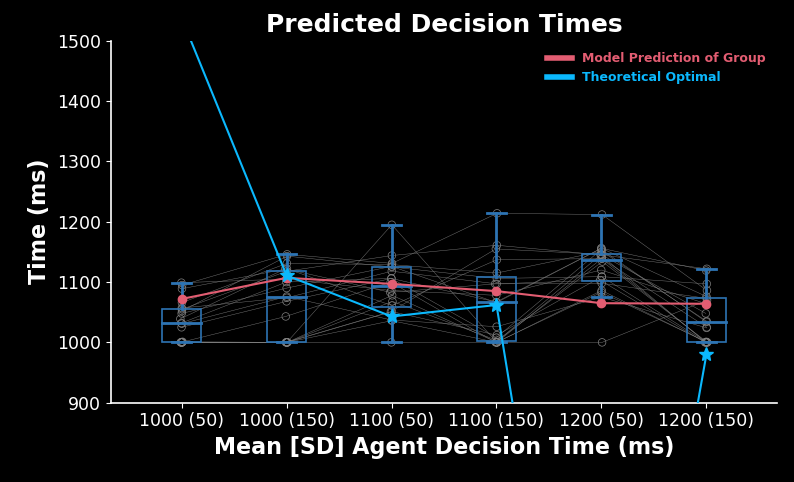

In [995]:
group.predict_stopping_times(model_true.inputs.gamble_delay['true'])
metric = group.combine_all_subjects('player_stopping_times')
true_player_metric       = model_true.results.fit_decision_time
exp_player_metric        = model_expected.results.fit_decision_time
true_optimal_metric      = model_true.results.optimal_decision_time
exp_optimal_metric       = model_expected.results.optimal_decision_time
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
pf.multiple_models_boxplot(ax,metric,show_boxplot=True,
                           true_player = true_player_metric, expected_player = None, 
                           true_optimal = true_optimal_metric,expected_optimal =None,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,linestyles = ['-']*4,
                            remove_parentheses_from_labels = False)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel(xlabel)
ax.set_ylabel('Time (ms)')
ax.set_title('Predicted Decision Times')
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()
plt.show()

LEave Target Time

In [996]:
importlib.reload(pf)

<module 'plot_functions' from 'd:\\onedrive - university of delaware - o365\\desktop\\matchpennies-agent-expirement\\src\\plot_functions.py'>

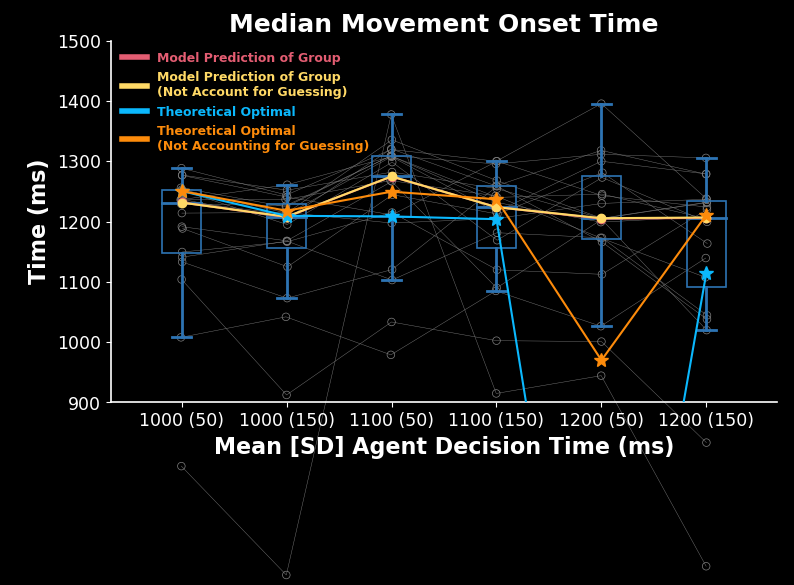

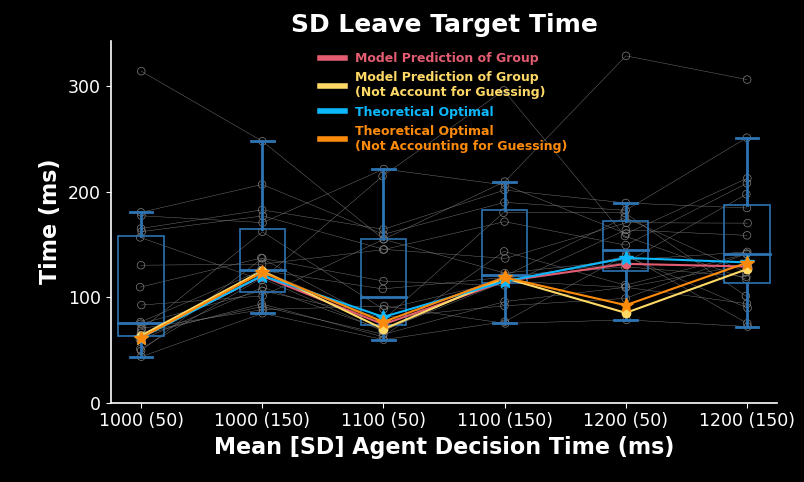

In [997]:
metric = np.nanmedian(group.player_task_leave_time,axis=2)
true_optimal_metric      = get_true_metric(model_true.player_behavior.wtd_leave_target_time,metric_type='optimal')
true_player_metric       = get_true_metric(model_true.player_behavior.wtd_leave_target_time,metric_type='fit')
exp_optimal_metric       = get_exp_metric(model_true.player_behavior.wtd_leave_target_time,metric_type='optimal')
exp_player_metric        = get_exp_metric(model_expected.player_behavior.wtd_leave_target_time,metric_type='fit')
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
pf.multiple_models_boxplot(ax,metric,show_boxplot=True,
                           true_player = true_player_metric, expected_player = exp_player_metric, 
                           true_optimal = true_optimal_metric,expected_optimal =exp_optimal_metric,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,linestyles = ['-']*4,
                            remove_parentheses_from_labels = False)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel(xlabel)
ax.set_ylabel('Time (ms)')
ax.set_title('Median Movement Onset Time')
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()
plt.show()

metric = np.nanstd(group.player_task_leave_time,axis=2)
true_optimal_metric      = get_true_metric(model_true.player_behavior.wtd_leave_target_time_sd,metric_type='optimal')
true_player_metric       = get_true_metric(model_true.player_behavior.wtd_leave_target_time_sd,metric_type='fit')
exp_optimal_metric       = get_exp_metric(model_expected.player_behavior.wtd_leave_target_time_sd,metric_type='optimal') # This one uses model_expected, 
exp_player_metric        = get_exp_metric(model_expected.player_behavior.wtd_leave_target_time_sd,metric_type='fit')
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,400,100)
bw = 0.75
pf.multiple_models_boxplot(ax,metric,show_boxplot=True,
                           true_player = true_player_metric, expected_player = exp_player_metric, 
                           true_optimal = true_optimal_metric,expected_optimal =exp_optimal_metric,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,linestyles = ['-']*4,
                            remove_parentheses_from_labels = False)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
# ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xlabel(xlabel)
ax.set_ylabel('Time (ms)')
ax.set_title('SD Leave Target Time')
# ax.plot(xlocs,np.sqrt(model_expected.gamble_reach_time_sd**2))
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()
plt.show()

Wins

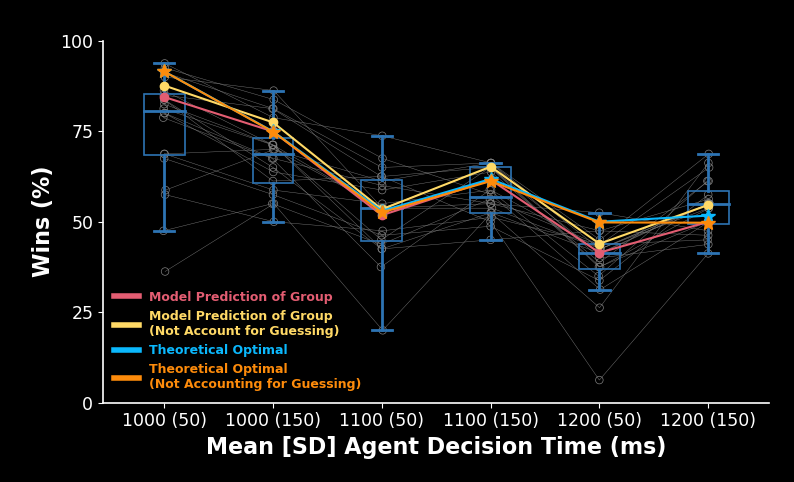

In [998]:
metric = group.player_perc_wins
true_player_metric       = get_true_metric(model_true.score_metrics.prob_win,metric_type='fit')*100
exp_player_metric        = get_exp_metric(model_expected.score_metrics.prob_win,metric_type='fit')*100
true_optimal_metric      = get_true_metric(model_true.score_metrics.prob_win,metric_type='optimal')*100
exp_optimal_metric       = get_exp_metric(model_true.score_metrics.prob_win,metric_type='optimal')*100
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multiple_models_boxplot(ax,metric,
                           true_player = true_player_metric, expected_player = exp_player_metric, 
                           true_optimal = true_optimal_metric,expected_optimal =exp_optimal_metric,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,remove_parentheses_from_labels=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel(xlabel)
ax.set_ylabel('Wins (%)')
# dv.custom_legend(ax,['Theoretical Optimal of Group','Model Prediction of Group'],['Orange','Green'])

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'wins_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Points

In [999]:
if experiment == 'Exp2':
    metric = group.player_points_scored

    true_optimal_metric = optimal_model_full_knowledge.max_exp_reward*group.num_task_trials[0]
    true_player_metric = group_model_true_true.expected_reward_of_decision_time*group.num_task_trials[0]
    exp_optimal_metric = optimal_model_no_knowledge.max_exp_reward*group.num_task_trials[0]
    exp_player_metric = (model_expected.expected_reward_of_decision_time*group.num_task_trials[0])

    w,h = 10,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(-80,100,40)

    bw = 0.75
    pf.multiple_models_boxplot(ax,metric, model.inputs.gamble_delay['true'] ,true_gamble_sd = model.inputs.gamble_decision_sd['true'], 
                               expected_gamble_delay=model.inputs.gamble_delay['exp'],expected_gamble_sd=model.inputs.gamble_delay['exp'],
                               true_player = None, expected_player = None, 
                            true_optimal = true_optimal_metric,expected_optimal =exp_optimal_metric,
                            xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)

    ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    # ax.set_ylim(0,100)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Points Scored')
    # dv.custom_legend(ax,['Theoretical Optimal of Group','Model Prediction of Group'],['Orange','Green'])
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'wins_with_optimal_model', dpi = 400, transparent = True)
    axmain.set_axis_off()
    plt.show()

Incorrects

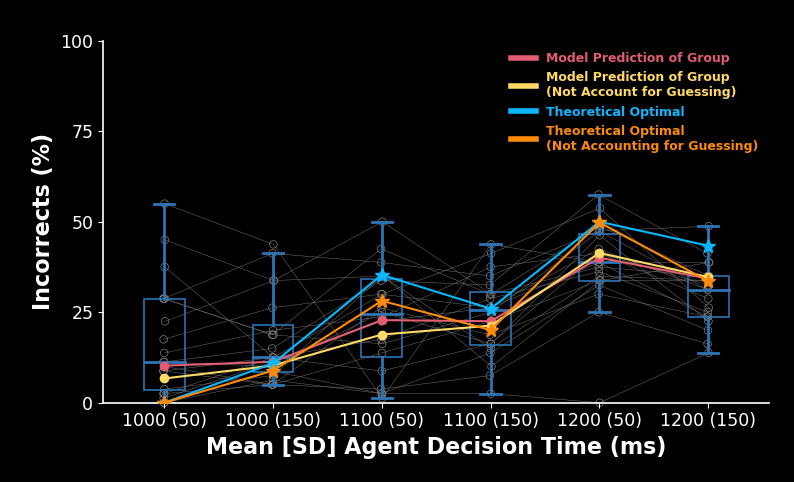

In [1000]:
metric = group.player_perc_incorrects
true_player_metric       = get_true_metric(model_true.score_metrics.prob_incorrect,metric_type='fit')*100
exp_player_metric        = get_exp_metric(model_expected.score_metrics.prob_incorrect,metric_type='fit')*100
true_optimal_metric      = get_true_metric(model_true.score_metrics.prob_incorrect,metric_type='optimal')*100
exp_optimal_metric       = get_exp_metric(model_true.score_metrics.prob_incorrect,metric_type='optimal')*100
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multiple_models_boxplot(ax,metric,
                           true_player = true_player_metric, expected_player = exp_player_metric, 
                           true_optimal = true_optimal_metric,expected_optimal =exp_optimal_metric,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,remove_parentheses_from_labels=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel(xlabel)
ax.set_ylabel('Incorrects (%)')
# dv.custom_legend(ax,['Theoretical Optimal of Group','Model Prediction of Group'],['Orange','Green'])

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Indecisions

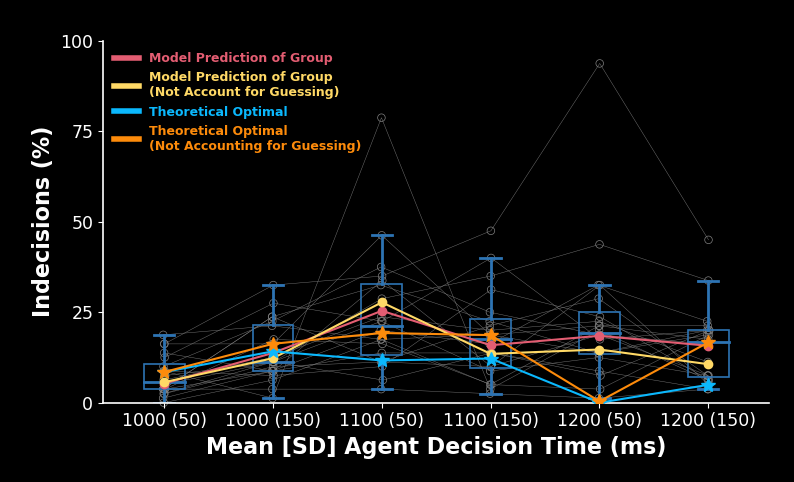

In [1001]:
metric = group.player_perc_indecisions
true_player_metric       = get_true_metric(model_true.score_metrics.prob_indecision,metric_type='fit')*100
exp_player_metric        = get_exp_metric(model_expected.score_metrics.prob_indecision,metric_type='fit')*100
true_optimal_metric      = get_true_metric(model_true.score_metrics.prob_indecision,metric_type='optimal')*100
exp_optimal_metric       = get_exp_metric(model_true.score_metrics.prob_indecision,metric_type='optimal')*100
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multiple_models_boxplot(ax,metric,
                           true_player = true_player_metric, expected_player = exp_player_metric, 
                           true_optimal = true_optimal_metric,expected_optimal =exp_optimal_metric,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,remove_parentheses_from_labels=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel(xlabel)
ax.set_ylabel('Indecisions (%)')
# dv.custom_legend(ax,['Theoretical Optimal of Group','Model Prediction of Group'],['Orange','Green'])

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Wins, Incorrects, Indecisions on One plot

Correct Initial Decisions

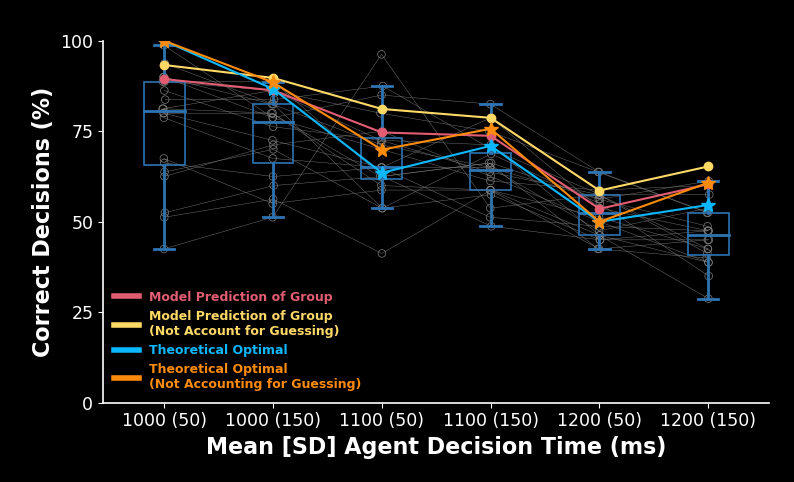

In [1002]:
metric = group.phat_correct*100 
true_player_metric       = get_true_metric(model_true.score_metrics.correct_decisions,metric_type='fit')*100
exp_player_metric        = get_exp_metric(model_expected.score_metrics.correct_decisions,metric_type='fit')*100
true_optimal_metric      = get_true_metric(model_true.score_metrics.correct_decisions,metric_type='optimal')*100
exp_optimal_metric       = get_exp_metric(model_true.score_metrics.correct_decisions,metric_type='optimal')*100
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multiple_models_boxplot(ax,metric,
                           true_player = true_player_metric, expected_player = exp_player_metric, 
                           true_optimal = true_optimal_metric,expected_optimal =exp_optimal_metric,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,remove_parentheses_from_labels=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel(xlabel)
ax.set_ylabel('Correct Decisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Guess Decisions

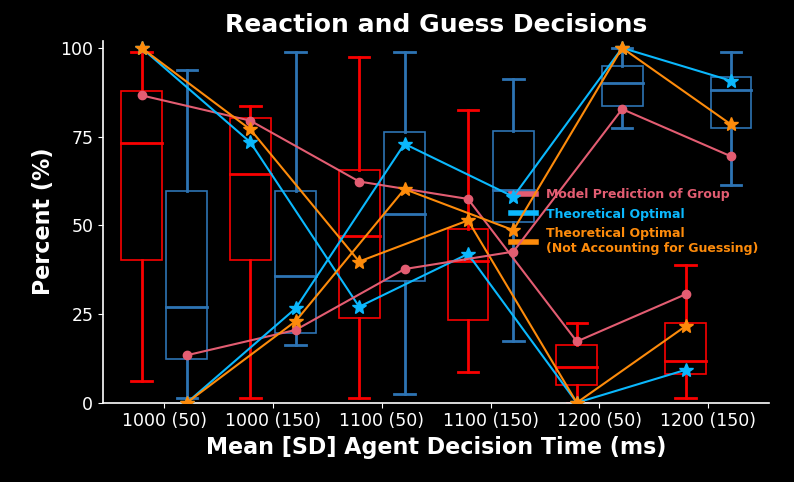

In [1003]:
exp_player_metric1     = get_exp_metric(model_expected.player_behavior.prob_selecting_reaction,metric_type='fit')*100
exp_player_metric2     = get_exp_metric(model_expected.player_behavior.prob_selecting_gamble,metric_type='fit')*100
true_player_metric1         = get_exp_metric(model_true.player_behavior.prob_selecting_reaction,metric_type='fit')*100
true_player_metric2         = get_exp_metric(model_true.player_behavior.prob_selecting_gamble,metric_type='fit')*100

exp_optimal_metric1   = get_exp_metric(model_true.player_behavior.prob_selecting_reaction)*100
exp_optimal_metric2   = get_exp_metric(model_true.player_behavior.prob_selecting_gamble)*100
true_optimal_metric1       = get_true_metric(model_true.player_behavior.prob_selecting_reaction)*100
true_optimal_metric2       = get_true_metric(model_true.player_behavior.prob_selecting_gamble)*100

data_metric1 = group.combine_all_subjects('perc_reaction_decisions')
data_metric2 = group.combine_all_subjects('perc_gamble_decisions')

# Out of x number of Reaction and Guess decisions, how many of them were indecisions
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
pf.multiple_models_boxplot(ax,data_metric1,true_player = true_player_metric1, expected_player = None, 
                           true_optimal = true_optimal_metric1, expected_optimal =exp_optimal_metric1,
                           xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red,jitter=False)

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = None, 
                           true_optimal = true_optimal_metric2, expected_optimal =exp_optimal_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel(xlabel)
ax.set_title('Reaction and Guess Decisions')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Guess Leave Times

c:\Users\Seth Sullivan\anaconda3\envs\aim1\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


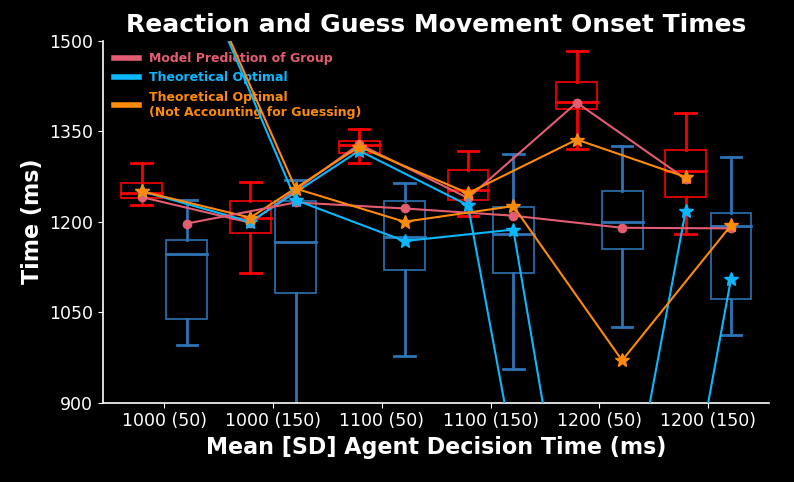

In [1004]:
data_metric1 = np.nanmedian(group.player_reaction_task_leave_time,axis=2)
data_metric2 = np.nanmedian(group.player_gamble_task_leave_time,axis=2)

exp_player_metric1     = get_exp_metric(model_expected.player_behavior.reaction_leave_time,metric_type='fit')
exp_player_metric2     = get_exp_metric(model_expected.player_behavior.gamble_leave_time,metric_type='fit')
true_player_metric1    = get_true_metric(model_true.player_behavior.reaction_leave_time,metric_type='fit')
true_player_metric2    = get_true_metric(model_true.player_behavior.gamble_leave_time,metric_type='fit')

exp_optimal_metric1    = get_exp_metric(model_true.player_behavior.reaction_leave_time)
exp_optimal_metric2    = get_exp_metric(model_true.player_behavior.gamble_leave_time)
true_optimal_metric1   = get_true_metric(model_true.player_behavior.reaction_leave_time)
true_optimal_metric2   = get_true_metric(model_true.player_behavior.gamble_leave_time)

# Out of x number of Reaction and Guess decisions, how many of them were indecisions
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1650,150)


bw = 0.75
pf.multiple_models_boxplot(ax,data_metric1,true_player = true_player_metric1, expected_player = None, 
                           true_optimal = true_optimal_metric1, expected_optimal =exp_optimal_metric1,
                           xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red,jitter=False)

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = None, 
                           true_optimal = true_optimal_metric2, expected_optimal =exp_optimal_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)
 
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel(xlabel)
ax.set_title('Reaction and Guess Movement Onset Times')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Agent Reaction and Guess Decision Times

c:\Users\Seth Sullivan\anaconda3\envs\aim1\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


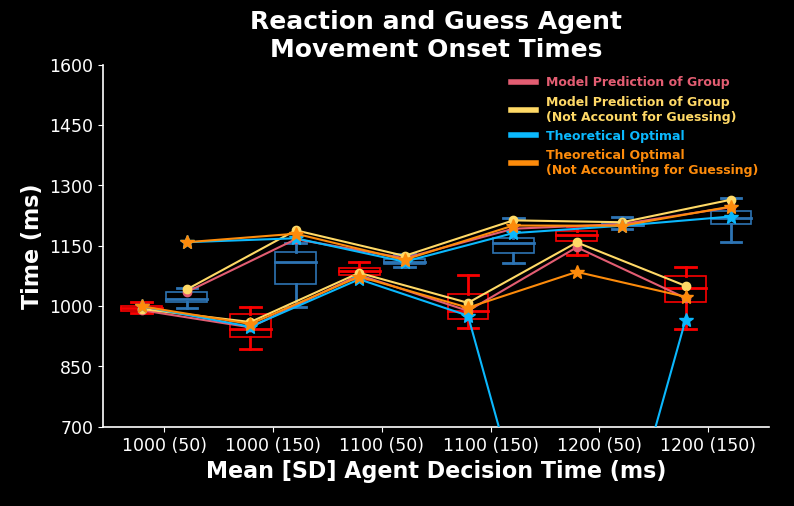

In [1005]:

data_metric1 = np.nanmedian(group.agent_reaction_task_leave_time,axis=2)
data_metric2 = np.nanmedian(group.agent_gamble_task_leave_time,axis=2)

exp_player_metric1   = get_exp_metric(model_expected.agent_behavior.reaction_leave_time,metric_type='fit')
exp_player_metric2   = get_exp_metric(model_expected.agent_behavior.gamble_leave_time,metric_type='fit')
true_player_metric1  = get_true_metric(model_true.agent_behavior.reaction_leave_time,metric_type='fit')
true_player_metric2  = get_true_metric(model_true.agent_behavior.gamble_leave_time,metric_type='fit')

exp_optimal_metric1   = get_exp_metric(model_true.agent_behavior.reaction_leave_time)
exp_optimal_metric2   = get_exp_metric(model_true.agent_behavior.gamble_leave_time)
true_optimal_metric1  = get_true_metric(model_true.agent_behavior.reaction_leave_time)
true_optimal_metric2  = get_true_metric(model_true.agent_behavior.gamble_leave_time)

# Out of x number of Reaction and Guess decisions, how many of them were indecisions
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(700,1750,150)


bw = 0.75
pf.multiple_models_boxplot(ax,data_metric1,true_player = true_player_metric1, expected_player = exp_player_metric1, 
                           true_optimal = true_optimal_metric1,expected_optimal=exp_optimal_metric1,
                           xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red,jitter=False)

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = exp_player_metric2, 
                           true_optimal = true_optimal_metric2,expected_optimal=exp_optimal_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel(xlabel)
ax.set_title('Reaction and Guess Agent\nMovement Onset Times')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Indecisions That Were Reaction/Gamble

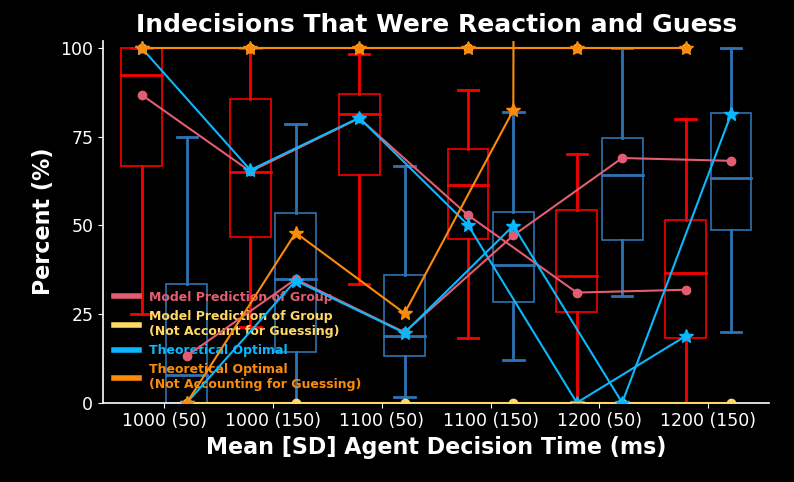

In [1006]:
# Out of x number of indecisions, how many were Reaction and Guess
data_metric1 = group.perc_indecisions_that_were_reactions 
data_metric2 = group.perc_indecisions_that_were_gambles 

exp_player_metric1   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_indecision_reaction,
                                                   model_expected.score_metrics.prob_indecision,metric_type='fit')
true_player_metric1  = reaction_gamble_metric_true(model_true.score_metrics.prob_indecision_reaction,
                                                  model_true.score_metrics.prob_indecision,
                                                  metric_type='fit')

exp_optimal_metric1  = reaction_gamble_metric_exp(model_true.score_metrics.prob_indecision_reaction,
                                                   model_expected.score_metrics.prob_indecision)
true_optimal_metric1 = reaction_gamble_metric_true(model_true.score_metrics.prob_indecision_reaction,
                                                 model_true.score_metrics.prob_indecision)

exp_player_metric2   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_indecision_gamble,
                                                   model_expected.score_metrics.prob_indecision,metric_type='fit')
true_player_metric2  = reaction_gamble_metric_true(model_true.score_metrics.prob_indecision_gamble,
                                                   model_true.score_metrics.prob_indecision,metric_type='fit')
exp_optimal_metric2  = reaction_gamble_metric_exp(model_true.score_metrics.prob_indecision_gamble,
                                                   model_expected.score_metrics.prob_indecision)
true_optimal_metric2 = reaction_gamble_metric_true(model_true.score_metrics.prob_indecision_gamble,
                                                   model_true.score_metrics.prob_indecision)

# Out of x number of Reaction and Guess decisions, how many of them were indecisions
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
pf.multiple_models_boxplot(ax,data_metric1,true_player = true_player_metric1, expected_player = exp_player_metric1, 
                           true_optimal = true_optimal_metric1,expected_optimal =exp_optimal_metric1,
                           xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red,jitter=False)

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = exp_player_metric2, 
                           true_optimal = true_optimal_metric2,expected_optimal =exp_optimal_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel(xlabel)
ax.set_title('Indecisions That Were Reaction and Guess')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

In [1007]:
get_true_metric(model_true.score_metrics.prob_indecision_gamble, metric_type='fit')

array([0.006995519, 0.047889132, 0.050368488, 0.074887142, 0.127503962,
       0.107248541])

Indecisions That Were Gamble

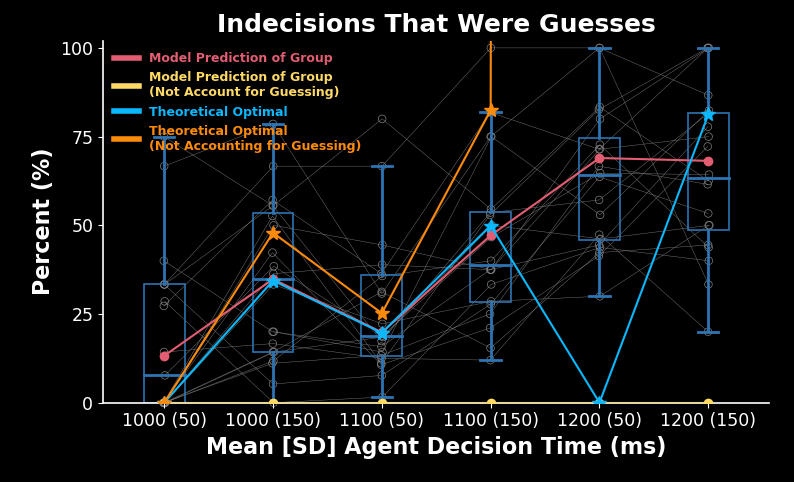

In [1008]:
# Out of x number of indecisions, how many were Reaction and Guess
data_metric2 = group.perc_indecisions_that_were_gambles 

exp_player_metric2   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_indecision_gamble,
                                                   model_expected.score_metrics.prob_indecision,metric_type='fit')
true_player_metric2  = reaction_gamble_metric_true(model_true.score_metrics.prob_indecision_gamble,
                                                   model_true.score_metrics.prob_indecision,metric_type='fit')
exp_optimal_metric2  = reaction_gamble_metric_exp(model_true.score_metrics.prob_indecision_gamble,
                                                   model_expected.score_metrics.prob_indecision)
true_optimal_metric2 = reaction_gamble_metric_true(model_true.score_metrics.prob_indecision_gamble,
                                                   model_true.score_metrics.prob_indecision)

# Out of x number of Reaction and Guess decisions, how many of them were indecisions
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = exp_player_metric2, 
                           true_optimal = true_optimal_metric2, expected_optimal = exp_optimal_metric2,
                           xlocs=xlocs,box_width = bw,colors = wheel.seth_blue,line_colors = None,jitter=True,remove_parentheses_from_labels=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel(xlabel)
ax.set_title('Indecisions That Were Guesses')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

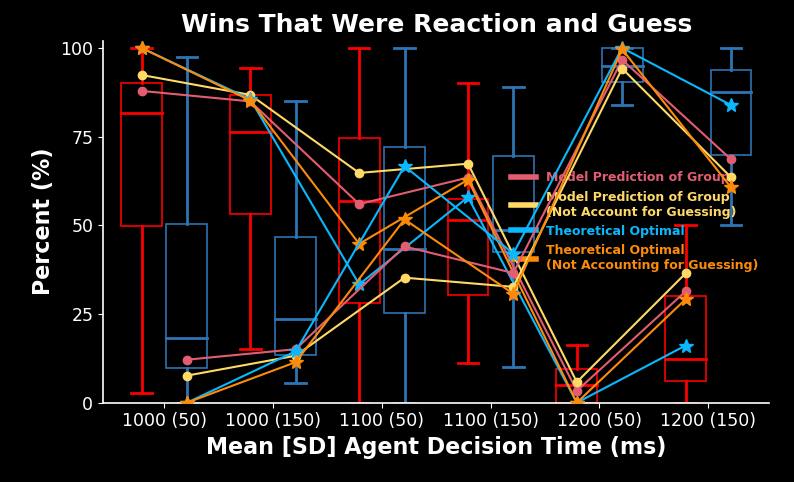

In [1009]:
# Out of x number of wins, how many were Reaction and Guess
data_metric1 = group.perc_wins_that_were_reactions 
data_metric2 = group.perc_wins_that_were_gambles 

exp_player_metric1   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_win_reaction,
                                                   model_expected.score_metrics.prob_win,metric_type='fit')
true_player_metric1  = reaction_gamble_metric_true(model_true.score_metrics.prob_win_reaction,
                                                  model_true.score_metrics.prob_win,
                                                  metric_type='fit')

exp_optimal_metric1  = reaction_gamble_metric_exp(model_true.score_metrics.prob_win_reaction,
                                                   model_expected.score_metrics.prob_win)
true_optimal_metric1 = reaction_gamble_metric_true(model_true.score_metrics.prob_win_reaction,
                                                 model_true.score_metrics.prob_win)

exp_player_metric2   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_win_gamble,
                                                   model_expected.score_metrics.prob_win,metric_type='fit')
true_player_metric2  = reaction_gamble_metric_true(model_true.score_metrics.prob_win_gamble,
                                                   model_true.score_metrics.prob_win,metric_type='fit')
exp_optimal_metric2  = reaction_gamble_metric_exp(model_true.score_metrics.prob_win_gamble,
                                                   model_expected.score_metrics.prob_win)
true_optimal_metric2 = reaction_gamble_metric_true(model_true.score_metrics.prob_win_gamble,
                                                   model_true.score_metrics.prob_win)

# Out of x number of Reaction and Guess decisions, how many of them were wins
w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
pf.multiple_models_boxplot(ax,data_metric1,true_player = true_player_metric1, expected_player = exp_player_metric1, 
                           true_optimal = true_optimal_metric1,expected_optimal =exp_optimal_metric1,
                           xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red,jitter=False)

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = exp_player_metric2, 
                           true_optimal = true_optimal_metric2,expected_optimal =exp_optimal_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel(xlabel)
ax.set_title('Wins That Were Reaction and Guess')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Incorrects that were Reaction and Guess

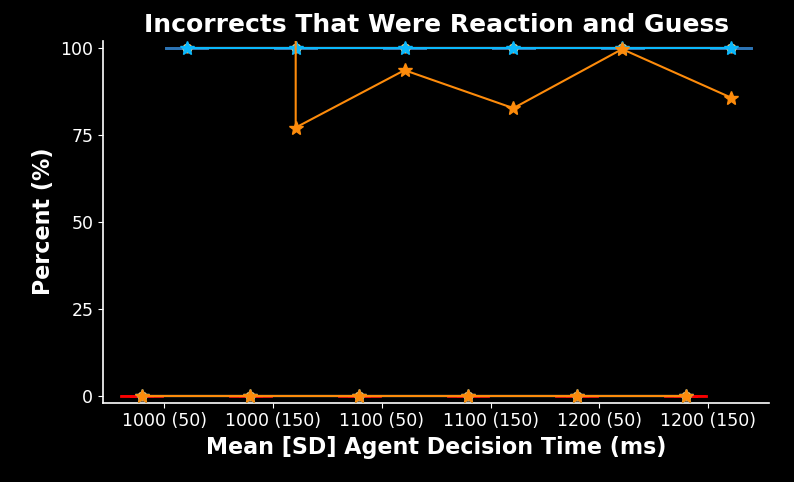

In [1010]:
# Out of x number of incorrects, how many were Reaction and Guess
data_metric1 = group.perc_incorrects_that_were_reactions 
data_metric2 = group.perc_incorrects_that_were_gambles 

exp_player_metric1   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_incorrect_reaction,
                                                   model_expected.score_metrics.prob_incorrect,metric_type='fit')
true_player_metric1  = reaction_gamble_metric_true(model_true.score_metrics.prob_incorrect_reaction,
                                                  model_true.score_metrics.prob_incorrect,
                                                  metric_type='fit')

exp_optimal_metric1  = reaction_gamble_metric_exp(model_true.score_metrics.prob_incorrect_reaction,
                                                   model_expected.score_metrics.prob_incorrect)
true_optimal_metric1 = reaction_gamble_metric_true(model_true.score_metrics.prob_incorrect_reaction,
                                                 model_true.score_metrics.prob_incorrect)

exp_player_metric2   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_incorrect_gamble,
                                                   model_expected.score_metrics.prob_incorrect,metric_type='fit')
true_player_metric2  = reaction_gamble_metric_true(model_true.score_metrics.prob_incorrect_gamble,
                                                   model_true.score_metrics.prob_incorrect,metric_type='fit')
exp_optimal_metric2  = reaction_gamble_metric_exp(model_true.score_metrics.prob_incorrect_gamble,
                                                   model_expected.score_metrics.prob_incorrect)
true_optimal_metric2 = reaction_gamble_metric_true(model_true.score_metrics.prob_incorrect_gamble,
                                                   model_true.score_metrics.prob_incorrect)

w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
pf.multiple_models_boxplot(ax,data_metric1,true_player = true_player_metric1, expected_player = exp_player_metric1, 
                           true_optimal = true_optimal_metric1,expected_optimal =exp_optimal_metric1,
                           xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red,jitter=False)

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = exp_player_metric2, 
                           true_optimal = true_optimal_metric2,expected_optimal =exp_optimal_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)
pf.multiple_models_boxplot(ax,data_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs)-2,max(ylocs)+2)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel(xlabel)
ax.set_title('Incorrects That Were Reaction and Guess')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

OUt of the Reaction/Gamble How many times did they win

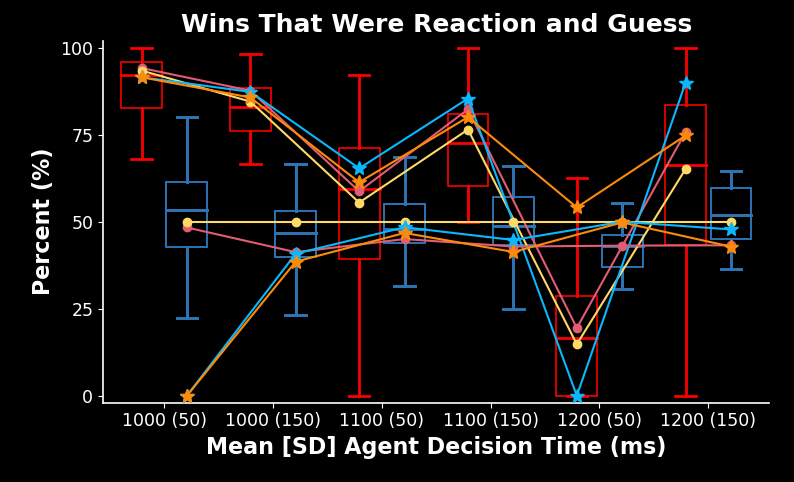

In [1011]:
#
#* Out of x number of reactions/gambles, how many were wins
data_metric1 = group.perc_reactions_that_were_wins 
data_metric2 = group.perc_gambles_that_were_wins 

exp_player_metric1   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_win_reaction,
                                                   model_expected.player_behavior.prob_selecting_reaction,metric_type='fit')
true_player_metric1  = reaction_gamble_metric_true(model_true.score_metrics.prob_win_reaction,
                                                  model_expected.player_behavior.prob_selecting_reaction,
                                                  metric_type='fit')

exp_optimal_metric1  = reaction_gamble_metric_exp(model_true.score_metrics.prob_win_reaction,
                                                   model_expected.player_behavior.prob_selecting_reaction)
true_optimal_metric1 = reaction_gamble_metric_true(model_true.score_metrics.prob_win_reaction,
                                                 model_expected.player_behavior.prob_selecting_reaction)

exp_player_metric2   = reaction_gamble_metric_exp(model_expected.score_metrics.prob_win_gamble,
                                                   model_expected.player_behavior.prob_selecting_gamble,metric_type='fit')
true_player_metric2  = reaction_gamble_metric_true(model_true.score_metrics.prob_win_gamble,
                                                   model_expected.player_behavior.prob_selecting_gamble,metric_type='fit')
exp_optimal_metric2  = reaction_gamble_metric_exp(model_true.score_metrics.prob_win_gamble,
                                                  model_expected.player_behavior.prob_selecting_gamble)
true_optimal_metric2 = reaction_gamble_metric_true(model_true.score_metrics.prob_win_gamble,
                                                   model_expected.player_behavior.prob_selecting_gamble)

w,h = 10,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
pf.multiple_models_boxplot(ax,data_metric1,true_player = true_player_metric1, expected_player = exp_player_metric1, 
                           true_optimal = true_optimal_metric1,expected_optimal =exp_optimal_metric1,
                           xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red,jitter=False)

pf.multiple_models_boxplot(ax,data_metric2,true_player = true_player_metric2, expected_player = exp_player_metric2, 
                           true_optimal = true_optimal_metric2,expected_optimal =exp_optimal_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)
pf.multiple_models_boxplot(ax,data_metric2,
                           xlocs=xlocs+bw/1.8,box_width = bw,colors = wheel.seth_blue,jitter=False)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs)-2,max(ylocs)+2)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel(xlabel)
ax.set_title('Wins That Were Reaction and Guess')
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Reaction and Guess That Were Indecisions 

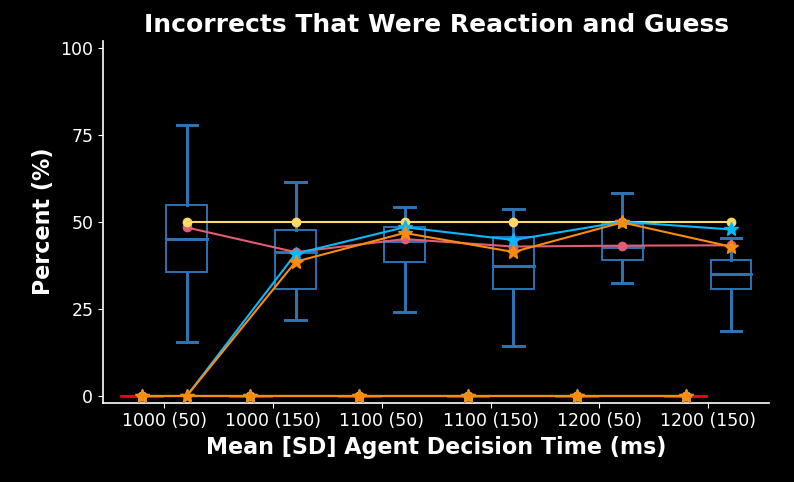

In [1012]:
#
# * Out of x number of reactions/gambles, how many were incorrects
data_metric1 = group.perc_reactions_that_were_incorrects
data_metric2 = group.perc_gambles_that_were_incorrects

exp_player_metric1 = reaction_gamble_metric_exp(
    model_expected.score_metrics.prob_incorrect_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
    metric_type="fit",
)
true_player_metric1 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_incorrect_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
    metric_type="fit",
)

exp_optimal_metric1 = reaction_gamble_metric_exp(
    model_true.score_metrics.prob_incorrect_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
)
true_optimal_metric1 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_incorrect_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
)

exp_player_metric2 = reaction_gamble_metric_exp(
    model_expected.score_metrics.prob_incorrect_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
    metric_type="fit",
)
true_player_metric2 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_incorrect_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
    metric_type="fit",
)
exp_optimal_metric2 = reaction_gamble_metric_exp(
    model_true.score_metrics.prob_incorrect_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
)
true_optimal_metric2 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_incorrect_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
)

w, h = 10, 6
axmain, ax = pf.make_figure_panel(
    figsize=(w, h), inset_size=(1.2, 0.9, w - 1.4, h - 1.3)
)
xlocs = np.linspace(0, w, num=len(trial_block_titles))
ylocs = np.arange(0, 125, 25)


bw = 0.75
pf.multiple_models_boxplot(
    ax,
    data_metric1,
    true_player=true_player_metric1,
    expected_player=exp_player_metric1,
    true_optimal=true_optimal_metric1,
    expected_optimal=exp_optimal_metric1,
    xlocs=xlocs - bw / 1.8,
    box_width=bw,
    colors=wheel.seth_red,
    jitter=False,
)

pf.multiple_models_boxplot(
    ax,
    data_metric2,
    true_player=true_player_metric2,
    expected_player=exp_player_metric2,
    true_optimal=true_optimal_metric2,
    expected_optimal=exp_optimal_metric2,
    xlocs=xlocs + bw / 1.8,
    box_width=bw,
    colors=wheel.seth_blue,
    jitter=False,
)
pf.multiple_models_boxplot(
    ax,
    data_metric2,
    xlocs=xlocs + bw / 1.8,
    box_width=bw,
    colors=wheel.seth_blue,
    jitter=False,
)
ax.set_xlim(min(xlocs) - 1.5 * bw, max(xlocs) + 1.5 * bw), ax.set_ylim(
    min(ylocs) - 2, max(ylocs) + 2
)

ax.set_xticks(xlocs), ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel("Percent (%)")
ax.set_xlabel(xlabel)
ax.set_title("Incorrects That Were Reaction and Guess")
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(
        SAVE_PATH + "reaction_and_gamble_decisions_with_optimal_model",
        dpi=400,
        transparent=True,
    )
axmain.set_axis_off()

plt.show()

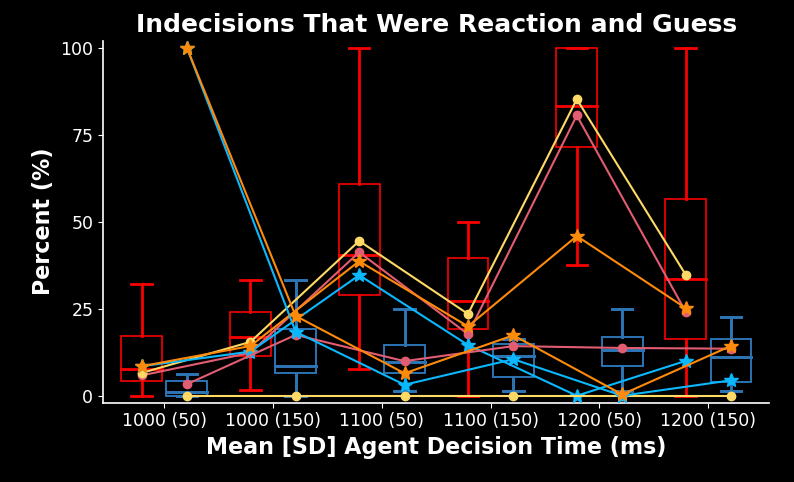

In [1013]:
#
# * Out of x number of reactions/gambles, how many were indecisions
data_metric1 = group.perc_reactions_that_were_indecisions
data_metric2 = group.perc_gambles_that_were_indecisions

exp_player_metric1 = reaction_gamble_metric_exp(
    model_expected.score_metrics.prob_indecision_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
    metric_type="fit",
)
true_player_metric1 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_indecision_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
    metric_type="fit",
)

exp_optimal_metric1 = reaction_gamble_metric_exp(
    model_true.score_metrics.prob_indecision_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
)
true_optimal_metric1 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_indecision_reaction,
    model_expected.player_behavior.prob_selecting_reaction,
)

exp_player_metric2 = reaction_gamble_metric_exp(
    model_expected.score_metrics.prob_indecision_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
    metric_type="fit",
)
true_player_metric2 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_indecision_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
    metric_type="fit",
)
exp_optimal_metric2 = reaction_gamble_metric_exp(
    model_true.score_metrics.prob_indecision_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
)
true_optimal_metric2 = reaction_gamble_metric_true(
    model_true.score_metrics.prob_indecision_gamble,
    model_expected.player_behavior.prob_selecting_gamble,
)

w, h = 10, 6
axmain, ax = pf.make_figure_panel(
    figsize=(w, h), inset_size=(1.2, 0.9, w - 1.4, h - 1.3)
)
xlocs = np.linspace(0, w, num=len(trial_block_titles))
ylocs = np.arange(0, 125, 25)


bw = 0.75
pf.multiple_models_boxplot(
    ax,
    data_metric1,
    true_player=true_player_metric1,
    expected_player=exp_player_metric1,
    true_optimal=true_optimal_metric1,
    expected_optimal=exp_optimal_metric1,
    xlocs=xlocs - bw / 1.8,
    box_width=bw,
    colors=wheel.seth_red,
    jitter=False,
)

pf.multiple_models_boxplot(
    ax,
    data_metric2,
    true_player=true_player_metric2,
    expected_player=exp_player_metric2,
    true_optimal=true_optimal_metric2,
    expected_optimal=exp_optimal_metric2,
    xlocs=xlocs + bw / 1.8,
    box_width=bw,
    colors=wheel.seth_blue,
    jitter=False,
)
pf.multiple_models_boxplot(
    ax,
    data_metric2,
    xlocs=xlocs + bw / 1.8,
    box_width=bw,
    colors=wheel.seth_blue,
    jitter=False,
)
ax.set_xlim(min(xlocs) - 1.5 * bw, max(xlocs) + 1.5 * bw)
ax.set_ylim(min(ylocs) - 2, max(ylocs) + 2)

ax.set_xticks(xlocs), ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel("Percent (%)")
ax.set_xlabel(xlabel)
ax.set_title("Indecisions That Were Reaction and Guess")
# dv.custom_legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize=10,loc =  (0.9,1))

if save:
    axmain.set_axis_off()
    plt.savefig(
        SAVE_PATH + "reaction_and_gamble_decisions_with_optimal_model",
        dpi=400,
        transparent=True,
    )
axmain.set_axis_off()

plt.show()